# kNN na dobry początek!

Na początku pobierzmy wymagane zbiory

In [ ]:
!git clone https://github.com/matzim95/ML-datasets

fatal: destination path 'ML-datasets' already exists and is not an empty directory.


In [ ]:
import pandas as pd

def load_dataset(filename, class_column, index_col=None):
    dataset = pd.read_csv(f'/content/drive/MyDrive/Klasyfikacja/zajecia/group/ML-datasets/{filename}.csv', index_col=index_col)
    dataset['class'] = dataset[class_column].astype('category').cat.codes
    classes = dataset.pop(class_column).unique()
    return dataset, classes

def prepare_dataset(dataset_name):
    params = {'iris': {'class_column': 'species', 'index_col': None},
              'wine': {'class_column': 'Class', 'index_col': None},
              'glass': {'class_column': 'Type', 'index_col': 'ID'},
              'diabetes': {'class_column': 'Class', 'index_col': None}}
    dataset, classes = load_dataset(dataset_name,
                                    **params[dataset_name])
    y = dataset.pop('class')
    X = dataset
    return X, y, classes

In [ ]:
X, y, classes = prepare_dataset('diabetes')

In [ ]:
X.head()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


Przeprowadźmy klasyfikację win metodą kNN

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, stratify = y)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5, metric = 'manhattan')
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

Funckje do wyświetlania miar jakości modelu:

In [ ]:
print_results(calculate_metric(y_test, y_pred), classifier_id = 'KNN Manhattan')

Result for KNN Manhattan
----
Accuracy: 0.7468
Precision: 0.7401
Recall: 0.7468
F1 Score: 0.7407
Mislabeled: 39 out of 154




In [ ]:
knn = KNeighborsClassifier(n_neighbors=5, metric = 'minkowski', p = 1.5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [ ]:
print_results(calculate_metric(y_test, y_pred), classifier_id = 'KNN Minkowski')

Result for KNN Minkowski
----
Accuracy: 0.8052
Precision: 0.8031
Recall: 0.8052
F1 Score: 0.7985
Mislabeled: 30 out of 154




Funckja do testowania typów odległości:

In [ ]:
from sklearn.metrics.pairwise import paired_distances

In [ ]:
X = [[0,1]]
Y = [[3,3]]

paired_distances(X,Y, metric = 'manhattan')

array([5.])

Zadanie: 

Wygeneruj zbiór punktów 1,1 2,2 3,3 4,4 5,5 i policz dla nich kolejno odległości euklidesową, chebyshewa, manhattan, minkowskiego, od punku 0,0. Wrzuć to na wykres scatterplo, oś x -metryka, oś y- odległość

In [ ]:
import numpy as np
import scipy.spatial.distance as dist
import plotly.graph_objects as go


points = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5]])
labels = ['Euklidesowa', 'Chebysheva', 'Manhattan', 'Minkowski']
metrics = ['euclidean', 'chebyshev', 'cityblock', 'minkowski']
colors = ['blue', 'red', 'green', 'cyan', 'purple']


distances = {i: [] for i in range(len(points))}

for i in range(len(points)):
    for j, metric in enumerate(metrics):
        if metric == 'minkowski':
            distances[i].append([labels[j], dist.minkowski([0,0], points[i], 3)])
        else:
            distances[i].append([labels[j], dist.pdist([[0,0], points[i]], metric=metric)[0]])


In [ ]:
distances

{0: [['Euklidesowa', 1.4142135623730951],
  ['Chebysheva', 1.0],
  ['Manhattan', 2.0],
  ['Minkowski', 1.2599210498948732]],
 1: [['Euklidesowa', 2.8284271247461903],
  ['Chebysheva', 2.0],
  ['Manhattan', 4.0],
  ['Minkowski', 2.5198420997897464]],
 2: [['Euklidesowa', 4.242640687119285],
  ['Chebysheva', 3.0],
  ['Manhattan', 6.0],
  ['Minkowski', 3.7797631496846193]],
 3: [['Euklidesowa', 5.656854249492381],
  ['Chebysheva', 4.0],
  ['Manhattan', 8.0],
  ['Minkowski', 5.039684199579492]],
 4: [['Euklidesowa', 7.0710678118654755],
  ['Chebysheva', 5.0],
  ['Manhattan', 10.0],
  ['Minkowski', 6.299605249474365]]}

In [ ]:
import plotly.graph_objects as go


points = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5]])
labels = ['Euklidesowa', 'Chebysheva', 'Manhattan', 'Minkowski']
metrics = ['euclidean', 'chebyshev', 'cityblock', 'minkowski']
colors = ['blue', 'red', 'green', 'cyan', 'purple']

distances = {i: [] for i in range(len(points))}
for i in range(len(points)):
    for j, metric in enumerate(metrics):
        if metric == 'minkowski':
            distances[i].append([labels[j], dist.minkowski([0,0], points[i], 3)])
        else:
            distances[i].append([labels[j], dist.pdist([[0,0], points[i]], metric=metric)[0]])


fig = go.Figure()

for i in range(len(points)):
    fig.add_trace(go.Scatter(
        x=[distance[0] for distance in distances[i]],
        y=[distance[1] for distance in distances[i]],
        mode='markers',
        marker=dict(
            color=colors[i],
            size=10, 
        ),
        name=f'Punkt {i+1},{i+1}'
    ))

fig.update_layout(
    title='Odległości między punktami a punktem (0,0)',
    xaxis_title='Metryka',
    yaxis_title='Odległość',
    legend_title='Punkt',
)

fig.show()

In [ ]:
#inna wersja

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import cdist

In [ ]:
# Zdefiniuj zbiór punktów
points = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5]])

In [ ]:
# Oblicz odległości dla różnych metryk
dist_euclidean = cdist(points, [[0, 0]], metric='euclidean').flatten()
dist_chebyshev = cdist(points, [[0, 0]], metric='chebyshev').flatten()
dist_manhattan = cdist(points, [[0, 0]], metric='cityblock').flatten()
dist_minkowski = cdist(points, [[0, 0]], metric='minkowski', p=3).flatten()

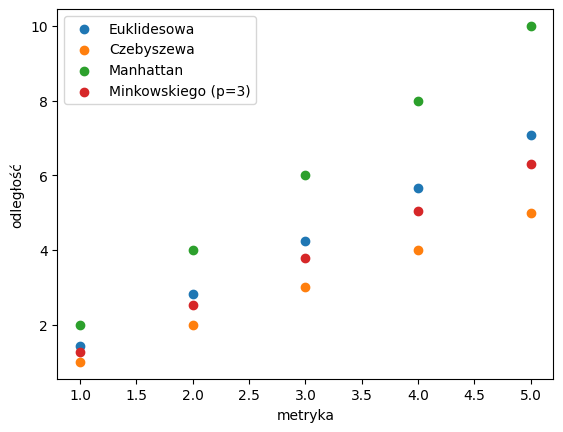

In [ ]:
# Wygeneruj wykres
plt.scatter(points[:, 0], dist_euclidean, label='Euklidesowa')
plt.scatter(points[:, 0], dist_chebyshev, label='Czebyszewa')
plt.scatter(points[:, 0], dist_manhattan, label='Manhattan')
plt.scatter(points[:, 0], dist_minkowski, label='Minkowskiego (p=3)')

# Ustawienia osi i legendy
plt.xlabel('metryka')
plt.ylabel('odległość')
plt.legend()

# Wyświetl wykres
plt.show()

ZADANIE DOMOWE: Przetestuj wpływ różnych rodzajów odległości i ilości sąsiadów na zbiorze glass.

# SVM

Przetestujmy SVM na zbiorze wine

In [ ]:
wine, wine_classes = load_dataset('wine', 'Class')
print(wine_classes)

y = wine.pop('class')
X = wine

['one' 'two' 'three']


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state = 30)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Train a linear SVM
svm = SVC(C = 0.1, kernel="linear")
svm.fit(X_train,y_train)
y_pred_train = svm.predict(X_train)
y_pred = svm.predict(X_test)


In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_train, y_pred_train),'\n')
print(confusion_matrix(y_test, y_pred))

[[45  0  2]
 [ 0 37  1]
 [ 0  1 56]] 

[[12  0  0]
 [ 0 10  0]
 [ 0  1 13]]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def calculate_metric(target, prediction, average = 'weighted'):
    accuracy = round(accuracy_score(target, prediction),4)
    precision = round(precision_score(target, prediction, average = average),4)
    recall = round(recall_score(target, prediction, average = average),4)
    f_score = round(f1_score(target, prediction, average = average),4)
    
    mislabeled = (target != prediction).sum()
    total = len(target)
    
    return accuracy, precision, recall, f_score, mislabeled, total


def print_results(metrics, classifier_id = 'classifier'):
    print(f'Result for {classifier_id}')
    print('----')
    print(f'Accuracy: {metrics[0]}')
    print(f'Precision: {metrics[1]}')
    print(f'Recall: {metrics[2]}')
    print(f'F1 Score: {metrics[3]}')
    print(f'Mislabeled: {metrics[4]} out of {metrics[5]}')
    print('\n')
    

In [ ]:
print_results(calculate_metric(y_test, y_pred), 'SVM Classifier')

Result for SVM Classifier
----
Accuracy: 0.9722
Precision: 0.9747
Recall: 0.9722
F1 Score: 0.9724
Mislabeled: 1 out of 36




I dobierzmy grid searchem optymalną wartość współczynnika regularyzacji

In [ ]:
X

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [ ]:
from sklearn.model_selection import GridSearchCV
svm = SVC()
svm.fit(X_train,y_train)

parameters = [{'kernel': ['linear'], 'C': [0.01, 0.1, 1, 10]},
              {'kernel': ['poly', 'rbf'], 'C': [0.01, 0.1, 1, 10], 'gamma': ['scale', 'auto']}]

searcher = GridSearchCV(svm, parameters, cv = 3, scoring = 'f1_weighted')
searcher.fit(X_train, y_train)

print("Best CV params", searcher.best_params_)
print("Best CV scores", searcher.best_score_)

Best CV params {'C': 0.01, 'gamma': 'auto', 'kernel': 'poly'}
Best CV scores 0.943494667014556


In [ ]:
for i in range(len(searcher.cv_results_['params'])):
    print(f"Parametry: {searcher.cv_results_['params'][i]}")

    for key in searcher.cv_results_.keys():

        if key != 'params':
            print(f"{key}: {searcher.cv_results_[key][i]}")
            
    print("\n---\n")

Parametry: {'C': 0.01, 'kernel': 'linear'}
mean_fit_time: 0.0080717404683431
std_fit_time: 0.0049762651365465775
mean_score_time: 0.0024995803833007812
std_score_time: 0.0003877447514131271
param_C: 0.01
param_kernel: linear
param_gamma: --
split0_test_score: 0.8947174358289365
split1_test_score: 0.9154625099556263
split2_test_score: 0.8710789672861828
mean_test_score: 0.893752971023582
std_test_score: 0.018132335007625695
rank_test_score: 8

---

Parametry: {'C': 0.1, 'kernel': 'linear'}
mean_fit_time: 0.028966506322224934
std_fit_time: 0.010227086060652675
mean_score_time: 0.0027216275533040366
std_score_time: 7.44309897424803e-05
param_C: 0.1
param_kernel: linear
param_gamma: --
split0_test_score: 0.958622311827957
split1_test_score: 0.9574468085106383
split2_test_score: 0.8919591047250622
mean_test_score: 0.9360094083545526
std_test_score: 0.03115196504663305
rank_test_score: 5

---

Parametry: {'C': 1, 'kernel': 'linear'}
mean_fit_time: 0.0403901735941569
std_fit_time: 0.018454990

In [ ]:
model = searcher.best_estimator_

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print_results(calculate_metric(y_test, y_pred), classifier_id = 'Best SVM')

Result for Best SVM
----
Accuracy: 0.9722
Precision: 0.9741
Recall: 0.9722
F1 Score: 0.972
Mislabeled: 1 out of 36




In [ ]:
final_model = SVC(C= 0.01, gamma='auto', kernel= 'poly')
model.fit(X,y)

SVC(C=0.01, gamma='auto', kernel='poly')

No dobrze, ale co w przypadku, gdy nasze dane nie są liniowo separowalne? Trzeba dokonać transofmracji. Do tego służy nam Kernel SVM

In [ ]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X,y = make_moons(n_samples = 1000, noise = 0, random_state=30)

<ipython-input-65-e3821c715961>:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g^" (-> color='g'). The keyword argument will take precedence.
  plt.plot(X[:,0][y==0],X[:,1][y==0], 'g^', color ='blue')


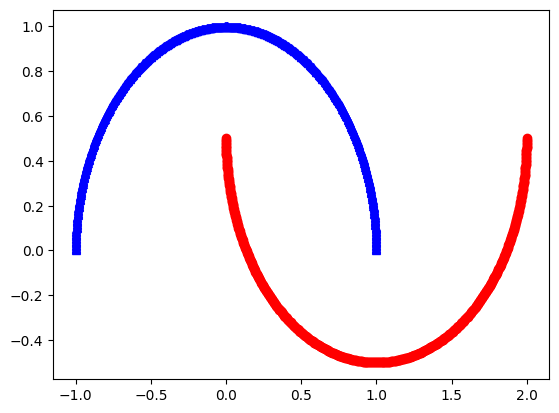

In [ ]:
plt.plot(X[:,0][y==1],X[:,1][y==1], 'o', color ='red')
plt.plot(X[:,0][y==0],X[:,1][y==0], 'g^', color ='blue')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y, test_size = 0.2, random_state = 30)

Porównajmy sobie różne wartości regularyzacji i przekształceń gamma

In [ ]:
from sklearn.model_selection import GridSearchCV
svm = SVC()
svm.fit(X_train,y_train)

parameters = [{'kernel': ['linear'], 'C': [0.01, 0.1, 1, 10]},
              {'kernel': ['poly', 'rbf'], 'C': [0.01, 0.1, 1, 10], 'gamma': ['scale', 'auto']}]

searcher = GridSearchCV(svm, parameters, cv = 3, scoring = 'f1_weighted')
searcher.fit(X_train, y_train)

print("Best CV params", searcher.best_params_)
print("Best CV scores", searcher.best_score_)

Best CV params {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
Best CV scores 1.0


In [ ]:
for i in range(len(searcher.cv_results_['params'])):
    print(f"Parametry: {searcher.cv_results_['params'][i]}")

    for key in searcher.cv_results_.keys():

        if key != 'params':
            print(f"{key}: {searcher.cv_results_[key][i]}")
            
    print("\n---\n")

Parametry: {'C': 0.01, 'kernel': 'linear'}
mean_fit_time: 0.003953774770100911
std_fit_time: 0.0006433397549541236
mean_score_time: 0.0024427572886149087
std_score_time: 8.757923562372035e-05
param_C: 0.01
param_kernel: linear
param_gamma: --
split0_test_score: 0.8277105223229128
split1_test_score: 0.8052270520435314
split2_test_score: 0.8570135234538561
mean_test_score: 0.8299836992734334
std_test_score: 0.02120275383638294
rank_test_score: 17

---

Parametry: {'C': 0.1, 'kernel': 'linear'}
mean_fit_time: 0.002713362375895182
std_fit_time: 0.00015130814361894793
mean_score_time: 0.0020400683085123696
std_score_time: 0.00014183872853755738
param_C: 0.1
param_kernel: linear
param_gamma: --
split0_test_score: 0.8538464849972018
split1_test_score: 0.8614193330091611
split2_test_score: 0.8871606334841629
mean_test_score: 0.8674754838301753
std_test_score: 0.01425870130664021
rank_test_score: 15

---

Parametry: {'C': 1, 'kernel': 'linear'}
mean_fit_time: 0.0027884642283121743
std_fit_time:

ZADANIE DOMOWE: Na zbiorze breast_cancer wytrenuj trzy wybrane modele, dobierz wartości parametrów i porównaj wyniki.

ZADANIE DOMOWE: Przeprowadź analogiczny eksperyment używając walidacji krzyżowej.